<a href="https://colab.research.google.com/github/Drkareemkamal/The-Sparks-Foundation/blob/main/UnSupervised_ML_for_Iris_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Sparks Foundation: Data Science and Business Analytics Tasks

# Task : *UnSupervised Machine Learning for Iris Classification*

In [ ]:
!unzip /content/iris.zip

# Import Libraries

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns
%matplotlib inline
import plotly.express as px


## load Data using `pd.read_csv`

In [3]:
df = pd.read_csv('/content/Iris.csv',)
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Inspect data
  - check data types
  - check mean median mode outliers
  - check missing value

In [4]:
# Drop the 'Id' and species column
df = df.drop(['Species','Id'], axis=1)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [5]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Check missing Values

In [7]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
dtype: int64

## Data Visualization

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score , precision_score , f1_score , confusion_matrix , classification_report , recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [10]:
X = df


## Using `K-Means` for iris Classification

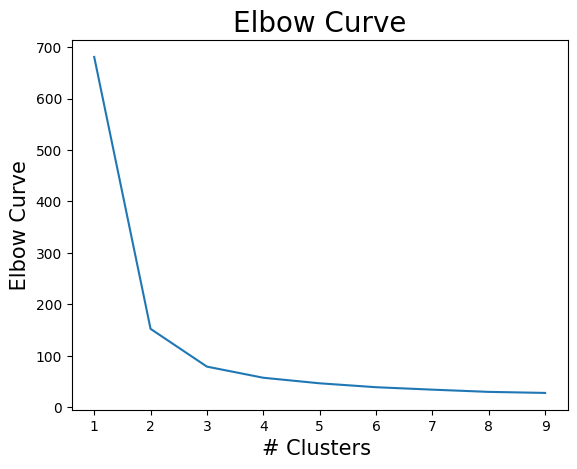

In [11]:
all_kmeans = [KMeans(n_clusters=i+1,n_init=80) for i in range(9)]
for i in range (9):
  all_kmeans[i].fit(df)
inertias = [all_kmeans[i].inertia_ for i in range(9)]

plt.plot(np.arange(1,10),inertias)
plt.title('Elbow Curve',size=20)
plt.xlabel('# Clusters ', size=15)
plt.ylabel(' Elbow Curve ',size=15)
plt.show();

## USE PCA for Iris Classifications

In [12]:
from sklearn.decomposition import PCA
pca = PCA()
z = pca.fit_transform(X)

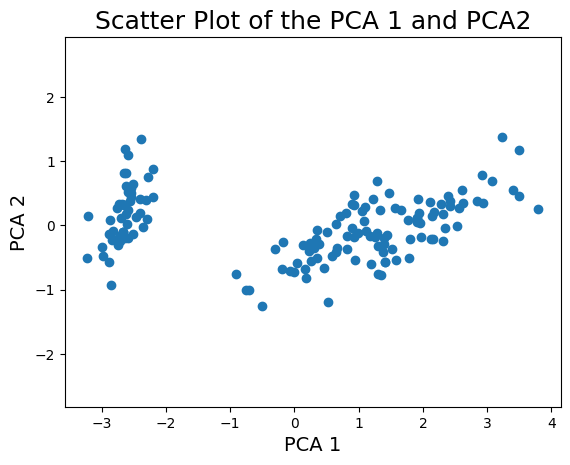

In [13]:
# let's use matplotlib to visualize PCA 1 and PCA 2
plt.scatter(z[:,0],z[:,1],)
plt.title('Scatter Plot of the PCA 1 and PCA2', size = 18)
plt.xlabel('PCA 1',size=14)
plt.ylabel('PCA 2',size=14)
plt.axis('equal')
plt.show()

** let's use `Yellowbrick and Silhouette Score`

In [14]:
# Create a KMeans model with 3 clusters
kmeans_3 = KMeans(3)
# Fit the data
kmeans_3.fit(X)


y_kmeans3 = kmeans_3.fit_predict(z)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


** Let's Plot `K-Means and PCA plot` using 3 Clusters


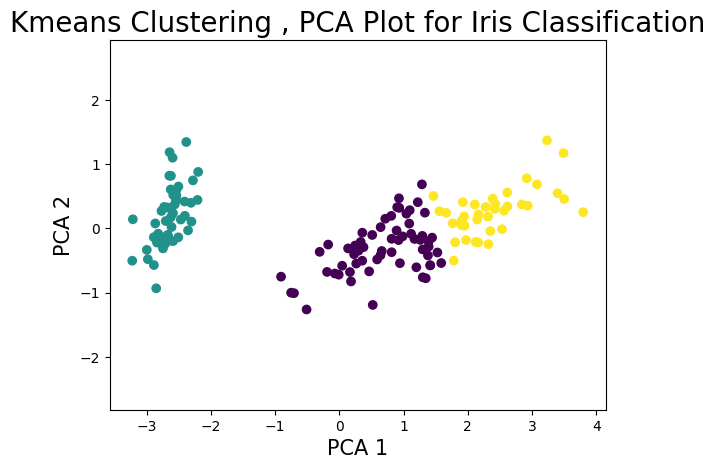

In [15]:
plt.scatter(z[:,0],z[:,1],c=y_kmeans3)
plt.title('Kmeans Clustering , PCA Plot for Iris Classification',size=20)
plt.xlabel('PCA 1',size = 15)
plt.ylabel('PCA 2', size = 15)
plt.axis('equal')
plt.show()

In [16]:
from sklearn.metrics import silhouette_samples,silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.style import rcmod
from yellowbrick.style.colors import resolve_colors

import warnings
warnings.simplefilter(action='ignore',category=plt.cbook.MatplotlibDeprecationWarning)

rcmod.reset_orig()

<ipython-input-16-9deb30b00727>:7: MatplotlibDeprecationWarning: MatplotlibDeprecationWarning was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use matplotlib.MatplotlibDeprecationWarning instead.
  warnings.simplefilter(action='ignore',category=plt.cbook.MatplotlibDeprecationWarning)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


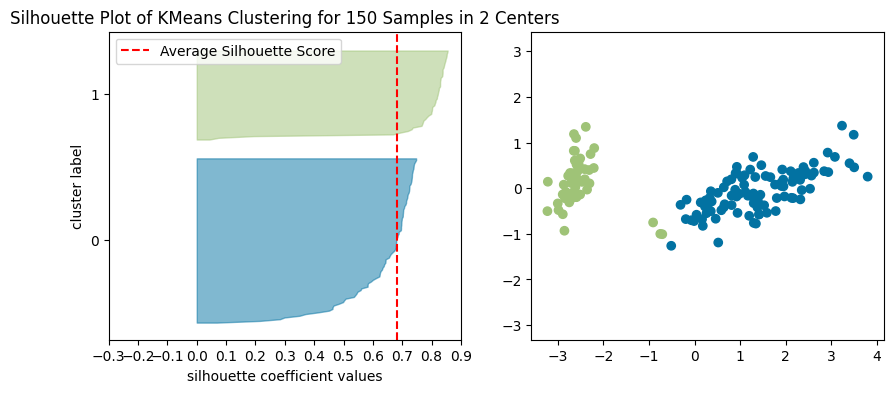

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


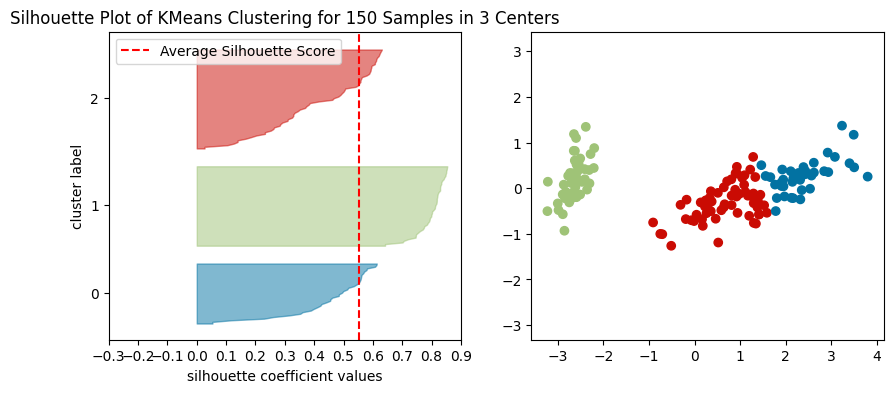

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


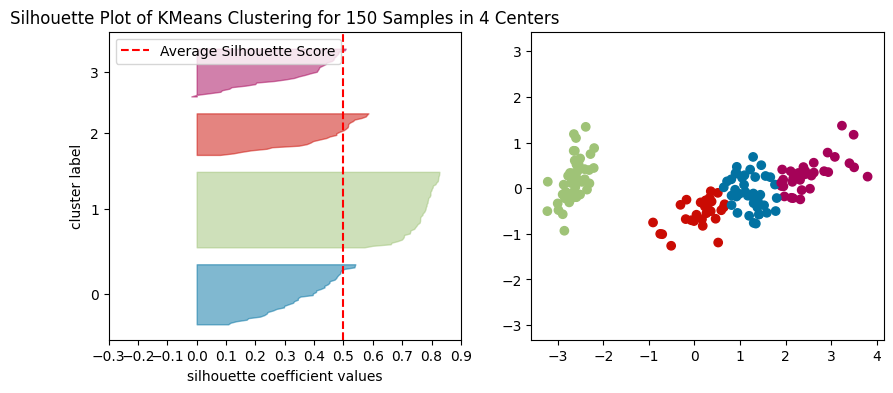

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


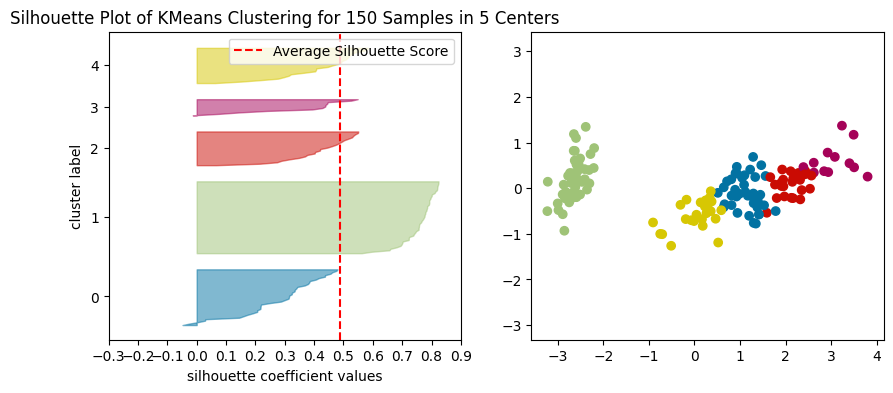

In [18]:
visualizers = [SilhouetteVisualizer(all_kmeans[i],colors='yellowbrick',is_fitted=True) for i in range(1,9)]

for i in range(4):
  fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,4))
  visualizer = SilhouetteVisualizer(all_kmeans[i+1],colors='yellowbrick',is_fitted=True,ax=ax1)
  visualizer.fit(X)

  colors = np.array(resolve_colors(i+2,'yellowbrick'))
  ax2.scatter(z[:,0],z[:,1],c=colors[all_kmeans[i+1].labels_])
  ax2.axis('equal')

  visualizer.finalize()
  ax1.set_xlim((-.3,0.9))
  plt.show();

 After using Silhouette Score we detect the best Cluster Numbers is `Three Claster `

